# Unsupervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into a statistical software tool such as Python or R.
- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
df = pd.read_csv('Wholesale_Data.csv')

In [2]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


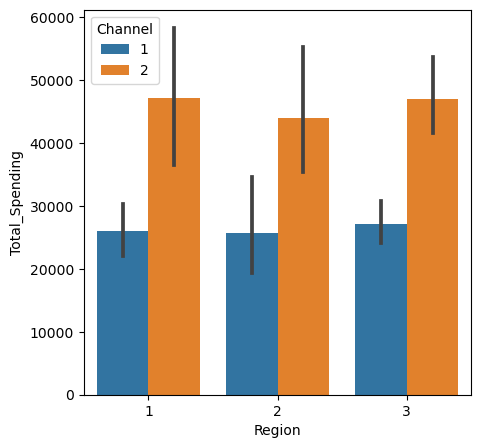

In [5]:
plt.figure(figsize=(5,5))
totalspend=sns.barplot(x='Region',y='Total_Spending',hue='Channel',
                       data= df.assign(Total_Spending =lambda x: x.Fresh + x.Milk + x.Grocery 
                                            +x.Frozen +x.Detergents_Paper +x.Delicassen))

# Part II - KMeans Clustering

In [6]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()
df_transformed = scaler.fit_transform(df)

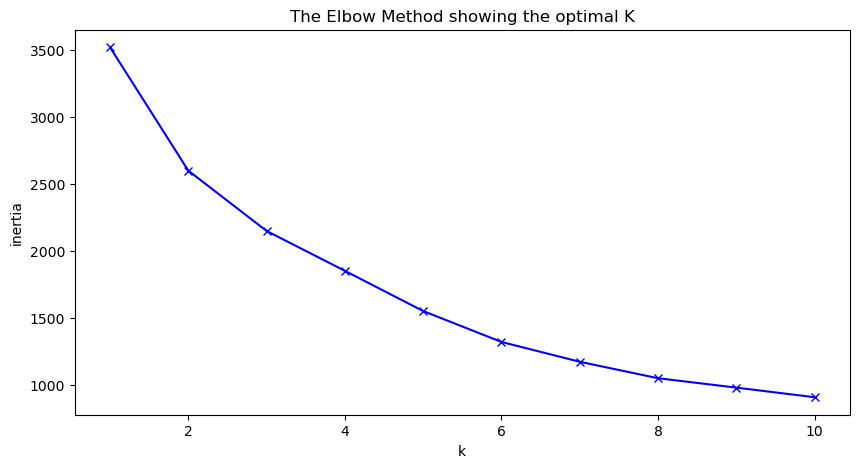

In [8]:
inertias = []
K = range(1,11)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_transformed)
    inertias.append(kmeanModel.inertia_)
    
# plot elbow method
plt.figure(figsize=(10,5))
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('The Elbow Method showing the optimal K')
plt.show()

In [9]:
from sklearn.metrics import silhouette_score

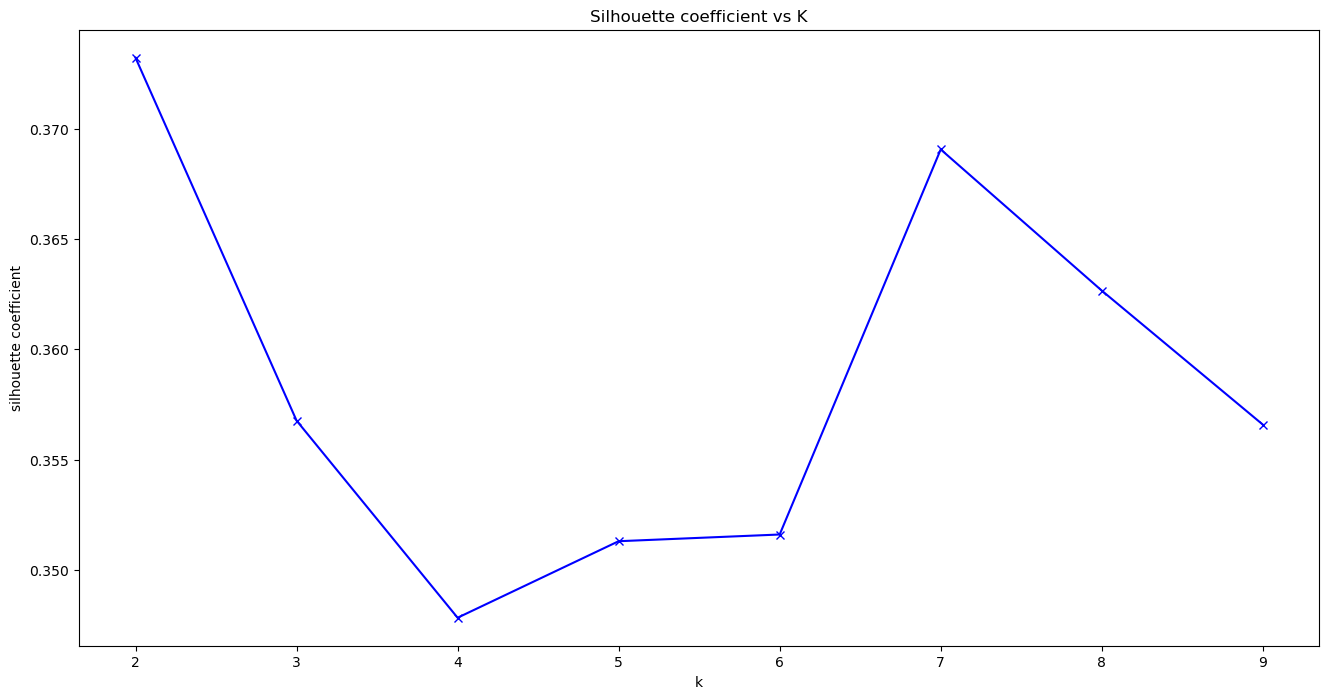

In [10]:
silhouettes = []
K = range(2,10) #run K-means with K ranging from 2 to 10
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_transformed)
    label=kmeanModel.predict(df_transformed)
    silhouettes.append(silhouette_score(df_transformed,label))
    
# plot silhouette
plt.figure(figsize=(16,8))
plt.plot(K, silhouettes, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette coefficient')
plt.title('Silhouette coefficient vs K')
plt.show()

In [39]:
kmeanModel = KMeans(n_clusters = 2,init = 'k-means++',max_iter = 300,n_init = 10,random_state = 0)  
kmeanModel.fit(df_transformed)
label = kmeanModel.predict(df_transformed)

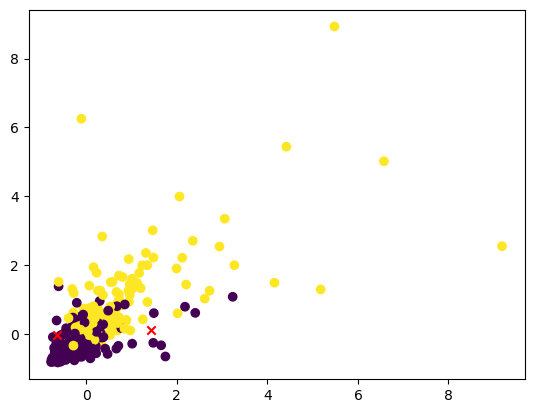

In [74]:
plt.scatter(df_transformed[:, 3], df_transformed[:, 4], c=label)
plt.scatter(kmeanModel.cluster_centers_[:, 0], kmeanModel.cluster_centers_[:, 1], marker='x', color='red')
plt.show()

In [104]:
silhouette_avg = silhouette_score(df_transformed, label)
print("Silhouette score:", silhouette_avg)

Silhouette score: 0.37323636511581165


The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

# Part III - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

In [84]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(df_transformed, method='ward')

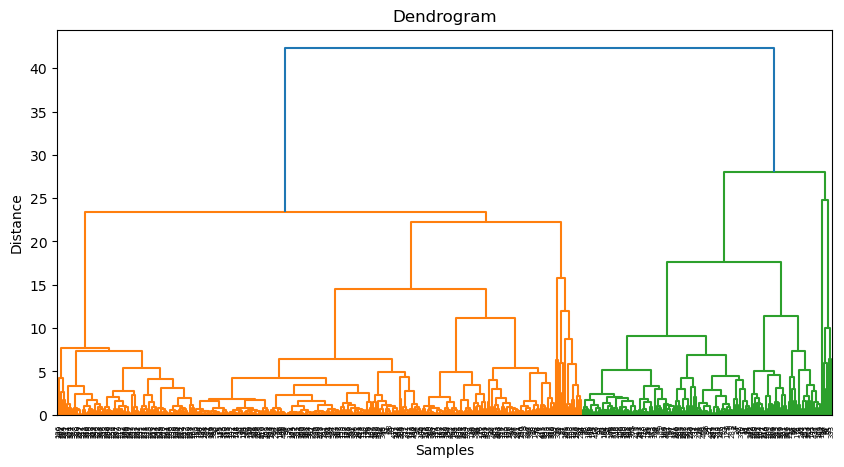

In [91]:
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.title('Dendrogram')
plt.show()


In [86]:
from sklearn.cluster import AgglomerativeClustering

In [87]:
hierarchical_cluster = AgglomerativeClustering(n_clusters=2)
cluster_labels = hierarchical_cluster.fit_predict(df_transformed)
plt.style.use('default')

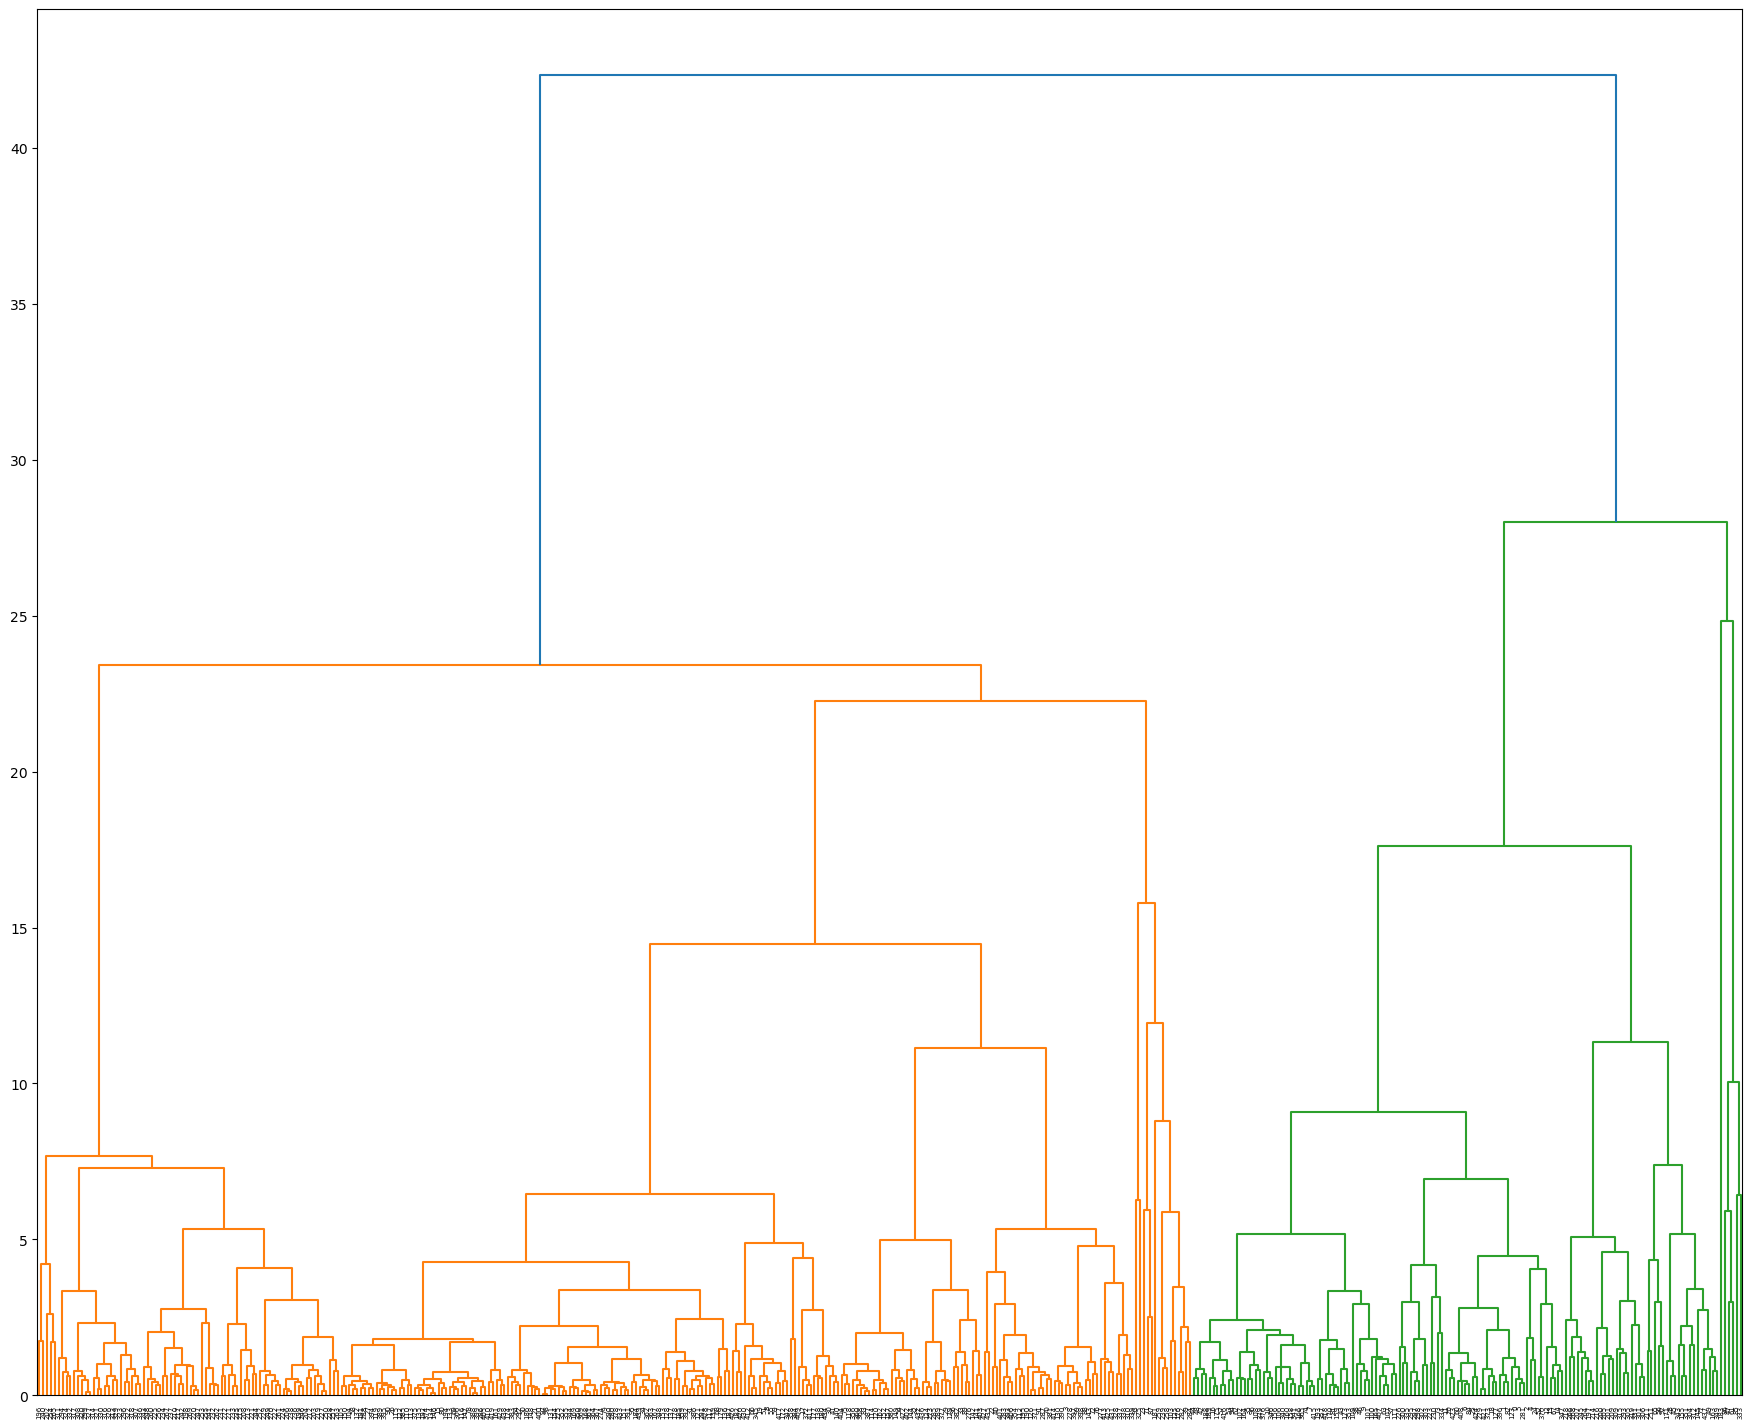

In [92]:
linkage_matrix = linkage(df_transformed, method='ward')
plt.figure(figsize=(22,18))
dendrogram(linkage_matrix)
plt.show()

In [28]:
from sklearn.metrics import adjusted_rand_score

In [95]:
single = AgglomerativeClustering(n_clusters=2, linkage="single")
single_pred = single.fit_predict(df_transformed)

complete = AgglomerativeClustering(n_clusters=2, linkage="complete")
complete_pred = complete.fit_predict(df_transformed)

avg = AgglomerativeClustering(n_clusters=2, linkage="average")
avg_pred = avg.fit_predict(df_transformed)

ward = AgglomerativeClustering(n_clusters=2, linkage="ward")
ward_pred = avg.fit_predict(df_transformed)

In [99]:
single_silhouette = silhouette_score(df_transformed, single_pred)
complete_silhouette = silhouette_score(df_transformed, complete_pred)
avg_silhouette = silhouette_score(df_transformed, avg_pred)
ward_silhouette = silhouette_score(df_transformed, ward_pred)

print( "Silhouette Scores: \nSingle:", single_silhouette,"\nComplete: ", complete_silhouette, "\nAverage: ", avg_silhouette, "\nWard: ", ward_silhouette)

Silhouette Scores: 
Single: 0.8263511877226627 
Complete:  0.8263511877226627 
Average:  0.8263511877226627 
Ward:  0.8263511877226627


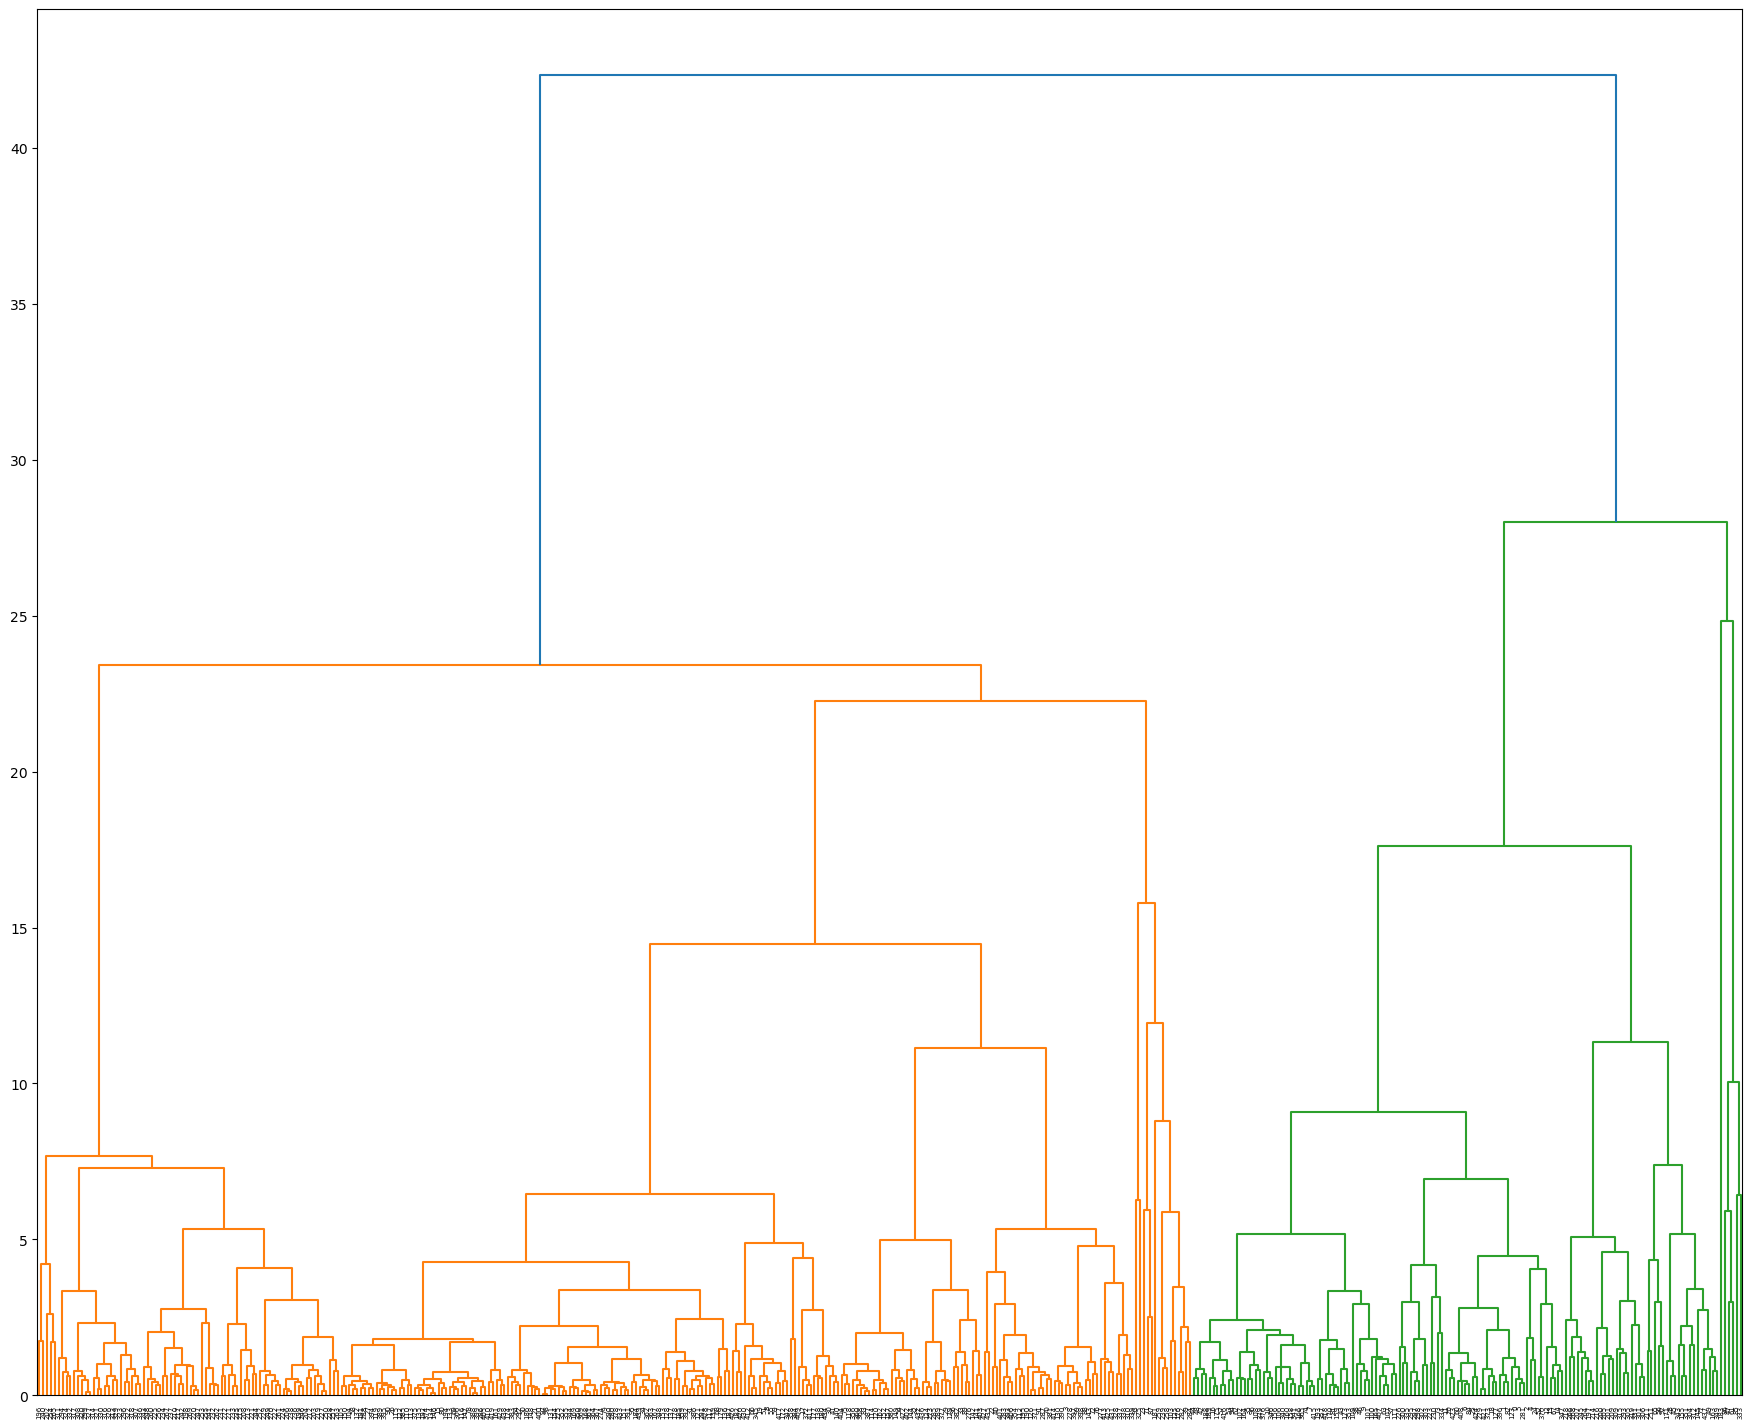

In [98]:
linkage_type = 'ward'

linkage_matrix = linkage(df_transformed, linkage_type)

plt.figure(figsize=(22,18))
dendrogram(linkage_matrix) # plot using 'dendrogram()'
plt.show()

# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

In [118]:
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
df_pca = pca.fit_transform(df_transformed)

In [107]:
explained_variance_ratio = df_pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

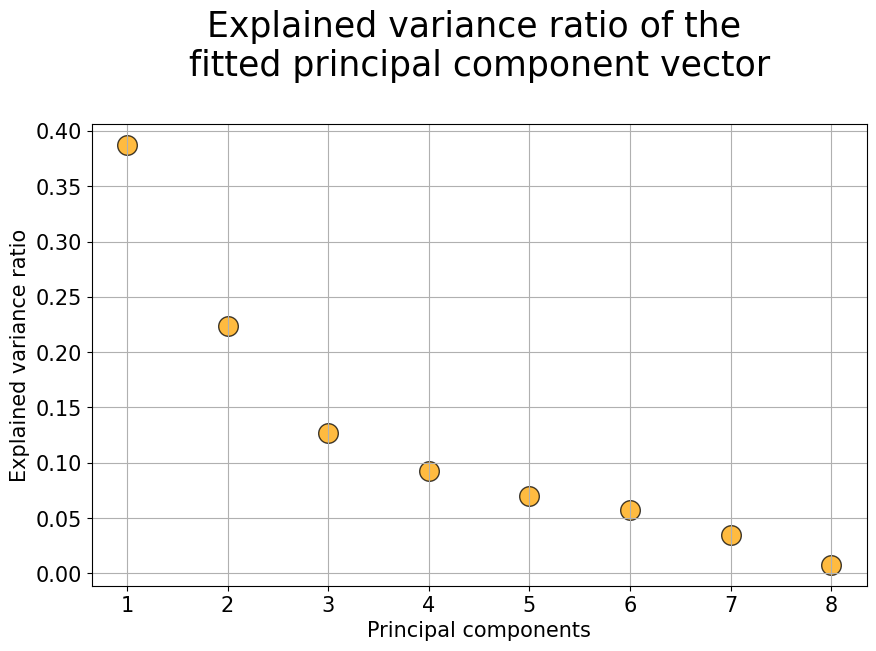

In [108]:
plt.figure(figsize=(10,6))
plt.scatter(x=[i+1 for i in range(len(explained_variance_ratio))],
            y=explained_variance_ratio,
           s=200, alpha=0.75,c='orange',edgecolor='k')
plt.grid(True)
plt.title("Explained variance ratio of the \nfitted principal component vector\n",fontsize=25)
plt.xlabel("Principal components",fontsize=15)
plt.xticks([i+1 for i in range(len(df_pca.explained_variance_ratio_))],fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Explained variance ratio",fontsize=15)
plt.show()

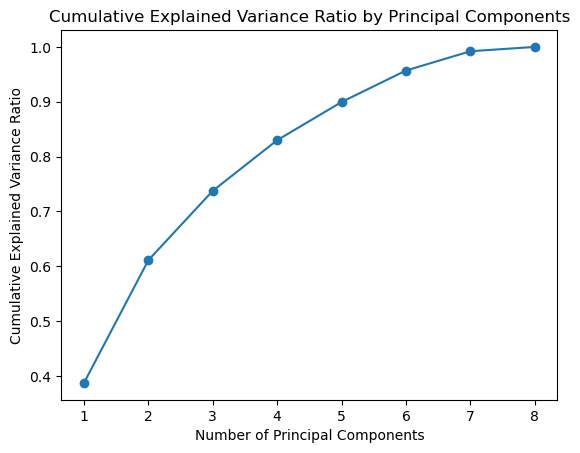

In [109]:
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio by Principal Components')
plt.show()

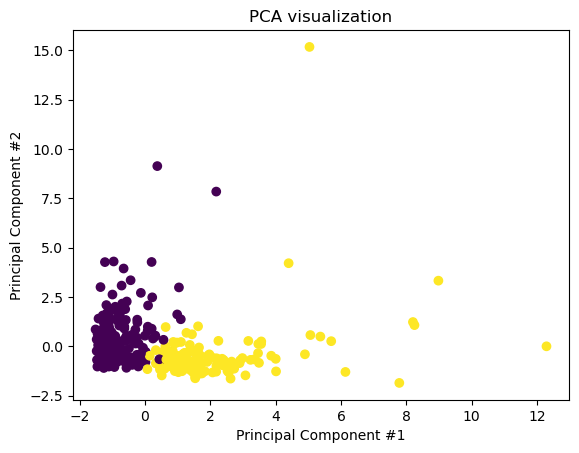

In [123]:
plt.scatter(df_pca[:,0],df_pca[:,1], c=label)
plt.xlabel('Principal Component #1')
plt.ylabel('Principal Component #2')
plt.title('PCA visualization')
plt.show()

In [135]:
feature_names = df.columns.tolist()
for i, component in enumerate(loadings):
    component_loadings = zip(feature_names, component)
    sorted_loadings = sorted(component_loadings, key=lambda x: abs(x[1]), reverse=True)
    print(f"Principal Component {i+1}:")
    for feature, loading in sorted_loadings:
        print(f"{feature}: {loading}")
    print()

Principal Component 1:
Grocery: 0.5363291447117989
Detergents_Paper: 0.5239062972851704
Milk: 0.47440994651414053
Channel: 0.42829156375465754
Delicassen: 0.1649965268180896
Frozen: -0.029974557941978362
Fresh: -0.025319457969254448
Region: 0.024726025256549957

Principal Component 2:
Frozen: 0.5927452524138281
Delicassen: 0.5331808185693444
Fresh: 0.5134446790025748
Milk: 0.2055406110430787
Channel: -0.20469885527983084
Detergents_Paper: -0.1210830909400614
Region: 0.04312964300421149
Grocery: -0.00871761988330316

Principal Component 3:
Region: -0.9825008890672728
Frozen: 0.12215652221201269
Fresh: -0.08895090744456301
Channel: -0.08297988625171822
Detergents_Paper: 0.04748143881698872
Grocery: 0.04531435715894531
Milk: 0.025751084205624063
Delicassen: -0.0009301993864758448

Principal Component 4:
Fresh: -0.7984759244611939
Delicassen: 0.537557668770899
Frozen: 0.16131688348619933
Detergents_Paper: -0.15101211192238326
Grocery: -0.12158624426980265
Region: 0.07784462485471905
Milk: 

# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

In [ ]:
# Agglomerative Clustering performs better than K means clustering
# there are 2 principal components the can explain the variance in the data more than 15% 
# scores for the 4 different types of linakages are the same
# We also found out that PCA #1 is heavily influenced by Grocery, Detergents Paper, Milk, and Channel
# While PCA#2 heavily influenced by Frozen, Delicassen, Fresh
